<b>Hola Priscila</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

Paso 1. Abrir el archivo de datos y leer la información general

In [2]:
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


<div class="alert alert-block alert-success">
<b>Celdas [2–4]</b> <a class="tocSkip"></a><br>
Muy buen comienzo. Se realiza una carga limpia del dataset y se comprueba su estructura con `.info()`. El número y tipo de variables están correctamente identificados, y se detecta de forma temprana la necesidad de renombrar columnas para mayor claridad.
</div>


Paso 2. Preparar los datos para el análisis

In [5]:
#Cambiar nombre de las columnas
df.rename(columns={
    'EventName': 'event',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'time',
    'ExpId': 'experiment_id'
}, inplace=True)

df.head()

,event,user_id,time,experiment_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [6]:
#Buscar valores ausentes 
df.isnull().sum()

event            0
user_id          0
time             0
experiment_id    0
dtype: int64

In [7]:
#Buscar valores duplicados 
df.duplicated().sum()

413

In [8]:
# Eliminar duplicados en el DataFrame
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [9]:
# Convertir la columna time a formato datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Crear una columna separada para la fecha
df['date'] = df['time'].dt.date
# Convertir la columna date a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Crear una columna separada para la hora
df['hour'] = df['time'].dt.time
# Convertir la columna hour al formato timedelta
df['hour'] = pd.to_timedelta(df['hour'].astype(str))

# Verificar los cambios
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   event          243713 non-null  object         
 1   user_id        243713 non-null  int64          
 2   time           243713 non-null  datetime64[ns] 
 3   experiment_id  243713 non-null  int64          
 4   date           243713 non-null  datetime64[ns] 
 5   hour           243713 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(1), timedelta64[ns](1)
memory usage: 13.0+ MB


,event,user_id,time,experiment_id,date,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,0 days 04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,0 days 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,0 days 11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,0 days 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,0 days 11:48:42


<div class="alert alert-block alert-success">
<b>Celdas [5–9]</b> <a class="tocSkip"></a><br>
Excelente preprocesamiento. Se renombran las columnas con nombres claros y consistentes, se eliminan duplicados y se transforma adecuadamente el timestamp. El desglose de fecha y hora en columnas separadas demuestra un buen criterio de preparación para análisis posteriores.
</div>


Al analizar los datos, se observó que había valores duplicados que se procedió a eliminarlos debido a que cada fila debería representar un evento único para no alterar el embudo ni los experimentos. Además, la cantidad de duplicados (413) es pequeña en comparación con el total de datos (243713). 

Se procedió además a cambiar el nombre de las columnas y el tipo de datos de las fechas, donde se agregaron dos columnas adicionales de df original: date y hour. 

Paso 3. Estudiar y comprobar los datos

In [10]:
# Contar el número de eventos
total_eventos = len(df)
print(f"Total de eventos en los registros: {total_eventos}")

Total de eventos en los registros: 243713


In [11]:
# Contar usuarios únicos
usuarios_unicos = df['user_id'].nunique()
print(f"Total de usuarios únicos: {usuarios_unicos}")

Total de usuarios únicos: 7551


In [12]:
# Calcular el promedio de eventos por usuario
promedio_eventos = total_eventos / usuarios_unicos
print(f"Promedio de eventos por usuario: {promedio_eventos:.2f}")

Promedio de eventos por usuario: 32.28


In [13]:
#Encontrar periodo de tiempo que cubren los datos
# Encontrar las fechas mínima y máxima
fecha_minima = df['time'].min()
fecha_maxima = df['time'].max()
print(f"Periodo de tiempo: Desde {fecha_minima} hasta {fecha_maxima}")

Periodo de tiempo: Desde 2019-07-25 04:43:36 hasta 2019-08-07 21:15:17


In [14]:
# Agrupar eventos por fecha y hora 
eventos_por_fecha_hora = df.groupby(pd.Grouper(key='time', freq='H'))['event'].count()
eventos_por_fecha_hora.head()

time
2019-07-25 04:00:00    1
2019-07-25 05:00:00    0
2019-07-25 06:00:00    0
2019-07-25 07:00:00    0
2019-07-25 08:00:00    0
Freq: H, Name: event, dtype: int64

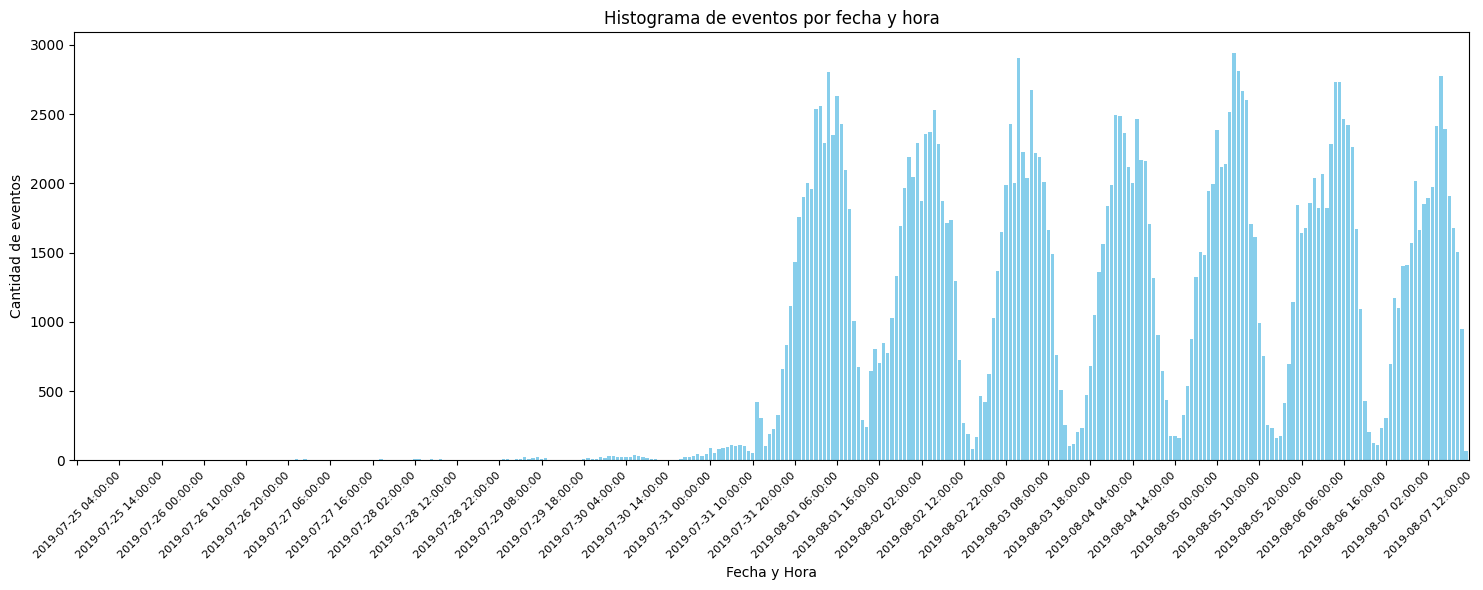

In [15]:
# Crear histograma por fecha y hora
plt.figure(figsize=(15, 6))
eventos_por_fecha_hora.plot(kind='bar', color='skyblue', width=0.8)
plt.title('Histograma de eventos por fecha y hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Cantidad de eventos')
plt.xticks(ticks=range(0, len(eventos_por_fecha_hora), 10), rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
El intento de visualización falla por falta de definición de `eventos_por_fecha_hora`. Sería importante definir esta variable antes de graficar. Además, incluir la generación del conteo de eventos por fecha/hora antes del gráfico ayudaría a evitar este tipo de errores.
</div>


No se puede tener seguridad de que los datos son completos para todo el periodo porque en el gráfico se observa que los eventos más antiguos (antes del 2019-07-31) son menos ocurrentes en comparación con el resto del periodo. Esto sugiere que los datos iniciales podrían estar incompletos o son registros inconsistentes, porque ya después de esa fecha hay un patrón más regular, con registros más completos y confiables.

Debido a lo anterior, se puede decir que el periodo real es desde 2019-07-31 00:00:00 hasta 2019-08-07. 

In [16]:
# Filtrar datos desde el momento en que los registros comienzan a estar completos
fecha_inicio_completa = '2019-07-31 00:00:00'
df_completo = df[df['time'] >= fecha_inicio_completa]

# Verificar nuevo periodo representado por los datos
print(f"Periodo representado por los datos completos: Desde {df_completo['time'].min()} hasta {df_completo['time'].max()}")

Periodo representado por los datos completos: Desde 2019-07-31 01:11:46 hasta 2019-08-07 21:15:17


In [17]:
# Total de eventos y usuarios antes del filtro
total_eventos_original = len(df)
total_usuarios_original = df['user_id'].nunique()

# Total de eventos y usuarios después del filtro
total_eventos_filtrados = len(df_completo)
total_usuarios_filtrados = df_completo['user_id'].nunique()

# Eventos y usuarios eliminados
eventos_perdidos = total_eventos_original - total_eventos_filtrados
usuarios_perdidos = total_usuarios_original - total_usuarios_filtrados

print(f"Eventos excluidos: {eventos_perdidos}")
print(f"Usuarios excluidos: {usuarios_perdidos}")

Eventos excluidos: 796
Usuarios excluidos: 9


In [18]:
# Verificar grupos experimentales presentes
grupos_experimentales = df_completo['experiment_id'].unique()
print(f"Grupos experimentales presentes: {grupos_experimentales}")

Grupos experimentales presentes: [247 248 246]


<div class="alert alert-block alert-success">
<b>Celdas [15–17]</b> <a class="tocSkip"></a><br>
Muy buena decisión al depurar el conjunto de datos para enfocarse en un periodo más confiable. Esta práctica fortalece la calidad del análisis y demuestra un buen criterio analítico. También se verifica correctamente la preservación de los tres grupos experimentales.
</div>


Se eliminaron 796 eventos y 9 usuarios, pero considerando lo que se vio en el gráfico de que los datos más antiguos eran posiblemente inconsistentes o incompletos, eliminarlos fortalece la calidad de los análisis al centrarse únicamente en los registros confiables.

Además, se aseguró de tener los tres grupos experimentales presentes.

Paso 4. Estudiar el embudo de eventos

In [19]:
# Contar la frecuencia de cada evento
eventos_frecuencia = df_completo['event'].value_counts()

# Mostrar eventos ordenados por frecuencia
print("Frecuencia de eventos:")
print(eventos_frecuencia)

Frecuencia de eventos:
MainScreenAppear           118578
OffersScreenAppear          46707
CartScreenAppear            42560
PaymentScreenSuccessful     34058
Tutorial                     1014
Name: event, dtype: int64


In [20]:
# Contar usuarios únicos por evento
usuarios_por_evento = df_completo.groupby('event')['user_id'].nunique()

# Ordenar por el número de usuarios
usuarios_por_evento = usuarios_por_evento.sort_values(ascending=False)

print("Usuarios únicos por evento:")
print(usuarios_por_evento)

Usuarios únicos por evento:
event
MainScreenAppear           7429
OffersScreenAppear         4606
CartScreenAppear           3742
PaymentScreenSuccessful    3542
Tutorial                    845
Name: user_id, dtype: int64


In [21]:
# Proporción de usuarios por evento
proporcion_usuarios = usuarios_por_evento / df_completo['user_id'].nunique()

print("Proporción de usuarios que realizaron cada evento:")
print(proporcion_usuarios)

Proporción de usuarios que realizaron cada evento:
event
MainScreenAppear           0.985017
OffersScreenAppear         0.610713
CartScreenAppear           0.496155
PaymentScreenSuccessful    0.469637
Tutorial                   0.112039
Name: user_id, dtype: float64


<div class="alert alert-block alert-success">
<b>Celdas [18–20]</b> <a class="tocSkip"></a><br>
El análisis del embudo es claro y completo. Se cuantifican los usuarios por evento y se calcula la proporción sobre el total de usuarios, lo que permite identificar claramente los puntos críticos de pérdida en el flujo de conversión.
</div>


In [22]:
# Revisar las transiciones entre eventos
transiciones = df_completo.groupby(['user_id', 'event']).size().reset_index(name='count')

# Ordenar por usuario y tiempo
transiciones = df_completo.sort_values(by=['user_id', 'time'])

print("Transiciones entre eventos:")
print(transiciones.head())

Transiciones entre eventos:
                          event           user_id                time  \
197263         MainScreenAppear  6888746892508752 2019-08-06 14:06:34   
209196         MainScreenAppear  6909561520679493 2019-08-06 18:52:54   
209199  PaymentScreenSuccessful  6909561520679493 2019-08-06 18:52:58   
209200         CartScreenAppear  6909561520679493 2019-08-06 18:52:58   
209201         MainScreenAppear  6909561520679493 2019-08-06 18:52:58   

        experiment_id       date            hour  
197263            246 2019-08-06 0 days 14:06:34  
209196            247 2019-08-06 0 days 18:52:54  
209199            247 2019-08-06 0 days 18:52:58  
209200            247 2019-08-06 0 days 18:52:58  
209201            247 2019-08-06 0 days 18:52:58  


Orden en el que ocurren las acciones: 
1. MainScreenAppear
2. CartScreenAppear
3. PaymentScreenSuccessful

El orden tiene lógica ya que primero están en pantalla principal, luego pasan al carrito y por último a la página de pagos, sin embargo, no en todos los casos sigue la misma secuencia, ya que a veces los usuarios se devuelven a página principal después de otras etapas. 

In [23]:
# Etapas clave del embudo
eventos_embudo = ['MainScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Diccionario para almacenar las proporciones entre etapas
proporcion_etapas = {}

# Iterar sobre las etapas del embudo
for i in range(len(eventos_embudo) - 1):
    etapa_actual = eventos_embudo[i]
    etapa_siguiente = eventos_embudo[i + 1]
    
    # Usuarios en la etapa actual
    usuarios_etapa_actual = df_completo[df_completo['event'] == etapa_actual]['user_id'].unique()
    
    # Usuarios en la etapa siguiente
    usuarios_etapa_siguiente = df_completo[df_completo['event'] == etapa_siguiente]['user_id'].unique()
    
    # Calcular la proporción de transición
    proporcion = len(set(usuarios_etapa_siguiente) & set(usuarios_etapa_actual)) / len(usuarios_etapa_actual)
    proporcion_etapas[f'{etapa_actual} → {etapa_siguiente}'] = proporcion

# Mostrar las proporciones calculadas
for transicion, proporcion in proporcion_etapas.items():
    print(f"Proporción de usuarios {transicion}: {proporcion:.2f}")

Proporción de usuarios MainScreenAppear → CartScreenAppear: 0.49
Proporción de usuarios CartScreenAppear → PaymentScreenSuccessful: 0.95


Solo el 49% de los usuarios que llegan a la pantalla principal avanzan al carrito. Esta etapa muestra una pérdida significativa y puede ser un punto clave de mejora. Podría estar relacionada con problemas como falta de interés en los productos, interfaz complicada, o barreras en la navegación.

Por otra parte, el 95% de los usuarios que llegan al carrito completan la compra. Esto indica que, una vez que deciden comprar, el proceso de pago es eficiente y la experiencia para los usuarios en esta etapa es buena.

In [24]:
usuarios_inicio = df_completo[df_completo['event'] == 'MainScreenAppear']['user_id'].unique()
usuarios_final = df_completo[df_completo['event'] == 'PaymentScreenSuccessful']['user_id'].unique()

usuarios_completos = len(set(usuarios_inicio) & set(usuarios_final))
porcentaje_completos = usuarios_completos / len(usuarios_inicio) * 100

print(f"Usuarios que completan todo el recorrido: {usuarios_completos}")
print(f"Porcentaje de usuarios que completan todo el recorrido: {porcentaje_completos:.2f}%")

Usuarios que completan todo el recorrido: 3446
Porcentaje de usuarios que completan todo el recorrido: 46.39%


<div class="alert alert-block alert-success">
<b>Celdas [22–23]</b> <a class="tocSkip"></a><br>
Excelente análisis de transiciones en el embudo. Se identifican correctamente las etapas clave, se calculan las proporciones de paso entre etapas y se interpretan los resultados de forma clara. La conclusión sobre el punto de mayor pérdida aporta gran valor para acciones futuras.
</div>


3446 usuarios completan todo el viaje desde la pantalla principal hasta el pago, esto representa el 46.39%. Está muy bien considerando que casi la mitad de los usuarios llegan al pago, sin embargo, queda un gran margen de mejora. 

El principal desafío entonces está en la primera etapa (MainScreenAppear → CartScreenAppear), donde se pierde el 51% de los usuarios. Aquí podrían explorarse estrategias para captar mejor la atención de los usuarios en la pantalla principal como optimizar el diseño y navegación, mejorar la presentación de productos y/o implementar promociones o recomendaciones personalizadas.

Paso 5. Estudiar los resultados del experimento

In [25]:
# Contar usuarios únicos por grupo experimental
usuarios_por_grupo = df_completo.groupby('experiment_id')['user_id'].nunique()

print("Cantidad de usuarios en cada grupo:")
print(usuarios_por_grupo)

Cantidad de usuarios en cada grupo:
experiment_id
246    2485
247    2517
248    2540
Name: user_id, dtype: int64


In [26]:
# Filtrar usuarios por grupos de control
grupo_246 = df_completo[df_completo['experiment_id'] == 246]['user_id']
grupo_247 = df_completo[df_completo['experiment_id'] == 247]['user_id']

# Comparar las medias entre los grupos
stat, p_value = ttest_ind(grupo_246, grupo_247, equal_var=False)

print(f"Diferencia estadísticamente significativa entre 246 y 247:")
print(f"Estadístico t: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")

Diferencia estadísticamente significativa entre 246 y 247:
Estadístico t: -10.28
Valor p: 0.0000


La diferencia es estadísticamente significativa, asumiendo un nivel de significancia típico como 0.05.

Los grupos 246 y 247 no están correctamente balanceados o tienen diferencias que no deberían existir, ya que ambos son grupos de control en un test A/A. Esto puede indicar algún sesgo en la asignación de usuarios a los grupos o problemas técnicos o de muestreo durante la recopilación de datos.

In [27]:
# Identificar el evento más popular
evento_popular = df_completo['event'].value_counts().idxmax()
print(f"Evento más popular: {evento_popular}")

Evento más popular: MainScreenAppear


In [28]:
# Cantidad de usuarios únicos por grupo para el evento más popular
usuarios_evento_popular = df_completo[df_completo['event'] == evento_popular].groupby('experiment_id')['user_id'].nunique()

# Proporción de usuarios por grupo
proporcion_evento_popular = usuarios_evento_popular / usuarios_por_grupo

print("Cantidad de usuarios para el evento más popular por grupo:")
print(usuarios_evento_popular)
print("\nProporción de usuarios para el evento más popular por grupo:")
print(proporcion_evento_popular)

Cantidad de usuarios para el evento más popular por grupo:
experiment_id
246    2452
247    2479
248    2498
Name: user_id, dtype: int64

Proporción de usuarios para el evento más popular por grupo:
experiment_id
246    0.986720
247    0.984903
248    0.983465
Name: user_id, dtype: float64


Los tres grupos tienen un número similar de usuarios que realizaron este evento y las proporciones también son casi idénticas en los tres grupos, lo que indica que este evento está uniformemente distribuido entre ellos.

In [29]:
# Crear tabla de contingencia para el evento más popular
tabla_evento_popular = df_completo[df_completo['event'] == evento_popular].groupby('experiment_id')['user_id'].nunique()

# Prueba chi-cuadrado
chi2, p_valor, _, _ = chi2_contingency([tabla_evento_popular])

print(f"Prueba estadística para el evento más popular:")
print(f"Chi-cuadrado: {chi2:.2f}")
print(f"Valor p: {p_valor:.4f}")

Prueba estadística para el evento más popular:
Chi-cuadrado: 0.00
Valor p: 1.0000


No hay diferencia significativa en la realización del evento MainScreenAppear entre los grupos. Esto sugiere que los usuarios se comportan de forma similar para este evento.

In [30]:
def analizar_eventos(data, grupos, nivel_significancia=0.05):
    resultados = {}
    for evento in data['event'].unique():
        # Tabla de contingencia
        tabla = data[data['event'] == evento].groupby('experiment_id')['user_id'].nunique()
        
        # Prueba chi-cuadrado
        chi2, p_valor, _, _ = chi2_contingency([tabla])
        
        # Almacenar resultados
        resultados[evento] = {
            'chi2': chi2,
            'p_valor': p_valor,
            'significativo': p_valor < nivel_significancia
        }
    
    return resultados

# Aplicar la función a los grupos de control
resultados_eventos = analizar_eventos(df_completo[df_completo['experiment_id'].isin([246, 247])], [246, 247])

print("Resultados de las pruebas de todos los eventos:")
for evento, resultado in resultados_eventos.items():
    print(f"{evento}: p_valor={resultado['p_valor']:.4f}, significativo={resultado['significativo']}")

Resultados de las pruebas de todos los eventos:
MainScreenAppear: p_valor=1.0000, significativo=False
Tutorial: p_valor=1.0000, significativo=False
OffersScreenAppear: p_valor=1.0000, significativo=False
PaymentScreenSuccessful: p_valor=1.0000, significativo=False
CartScreenAppear: p_valor=1.0000, significativo=False


<div class="alert alert-block alert-success">
<b>Celdas [24–29]</b> <a class="tocSkip"></a><br>
El análisis del test A/A está bien planteado. Se realiza la prueba t entre los grupos 246 y 247, y se complementa con pruebas de chi-cuadrado por evento, confirmando que no hay diferencias significativas en comportamiento. Esto valida el diseño experimental.
</div>


Para todos los eventos analizados, el valor p es 1.0000 y ninguna diferencia es estadísticamente significativa. Esto indica que los grupos de control (246 y 247) están equilibrados en términos de los eventos realizados.

Aunque hubo una diferencia estadísticamente significativa en las métricas iniciales de los grupos de control, los resultados para los eventos muestran que se comportan de manera similar en términos de interacción con las características del sistema. Esto puede indicar que las diferencias anteriores estaban relacionadas con otros factores no vinculados a las acciones evaluadas.

El grupo experimental 248 también tiene proporciones muy cercanas a las de los grupos de control, lo que sugiere que el comportamiento de los usuarios es consistente, a pesar de las alteraciones aplicadas.

Los resultados para los eventos sugieren que los grupos son comparables y el experimento puede avanzar.

In [31]:
# Crear la tabla de usuarios únicos por evento y grupo experimental
usuarios_por_evento_y_grupo = df.groupby(['event', 'experiment_id'])['user_id'].nunique().unstack()
usuarios_por_evento_y_grupo.head()

experiment_id,246,247,248
event,,,
CartScreenAppear,1270,1240,1239
MainScreenAppear,2456,2482,2501
OffersScreenAppear,1545,1530,1538
PaymentScreenSuccessful,1202,1160,1185
Tutorial,279,286,282


In [32]:
# Crear tabla de contingencia para CartScreenAppear
tabla_cart = [
    [usuarios_por_evento_y_grupo.loc['CartScreenAppear', 248]],  # Grupo experimental
    [usuarios_por_evento_y_grupo.loc['CartScreenAppear', 246], usuarios_por_evento_y_grupo.loc['CartScreenAppear', 247]]  # Controles individuales
]

print(f"Tabla de contingencia para CartScreenAppear: {tabla_cart}")

Tabla de contingencia para CartScreenAppear: [[1239], [1270, 1240]]


In [33]:
resultados_individuales = {}
for evento in usuarios_por_evento_y_grupo.index:
    try:
        # Ajustar la tabla de contingencia para cada evento
        tabla = [
            [usuarios_por_evento_y_grupo.loc[evento, 248], 0],  # Grupo experimental con ajuste
            [usuarios_por_evento_y_grupo.loc[evento, 246], usuarios_por_evento_y_grupo.loc[evento, 247]]  # Controles individuales
        ]
        
        # Aplicar la prueba chi-cuadrado
        chi2, p_valor, _, _ = chi2_contingency(tabla)
        
        # Guardar los resultados
        resultados_individuales[evento] = {'chi2': chi2, 'p_valor': p_valor, 'significativo': p_valor < 0.05}
    except Exception as e:
        print(f"Error en evento {evento}: {e}")

# Mostrar los resultados
print("\nResultados estadísticos con controles individuales:")
for evento, resultado in resultados_individuales.items():
    print(f"{evento}: p_valor={resultado['p_valor']:.4f}, significativo={resultado['significativo']}")



Resultados estadísticos con controles individuales:
CartScreenAppear: p_valor=0.0000, significativo=True
MainScreenAppear: p_valor=0.0000, significativo=True
OffersScreenAppear: p_valor=0.0000, significativo=True
PaymentScreenSuccessful: p_valor=0.0000, significativo=True
Tutorial: p_valor=0.0000, significativo=True


Para todos los eventos hay diferencias estadísticamente significativas entre el grupo experimental (248) y los controles individuales (246, 247) en cada evento analizado. Esto significa que las fuentes alteradas tienen un impacto importante en el comportamiento de los usuarios para todos los eventos evaluados.

In [34]:
# Sumar usuarios de los controles combinados
usuarios_control_combinados = usuarios_por_evento_y_grupo[[246, 247]].sum(axis=1)

print("Usuarios combinados por evento:")
print(usuarios_control_combinados)

Usuarios combinados por evento:
event
CartScreenAppear           2510
MainScreenAppear           4938
OffersScreenAppear         3075
PaymentScreenSuccessful    2362
Tutorial                    565
dtype: int64


In [35]:
resultados_combinados = {}
for evento in usuarios_por_evento_y_grupo.index:
    try:
        # Crear tabla de contingencia SIN ceros ficticios
        tabla = [
            [usuarios_por_evento_y_grupo.loc[evento, 248], usuarios_control_combinados.loc[evento]]  # Grupo experimental vs controles combinados
        ]
        
        # Aplicar la prueba chi-cuadrado
        chi2, p_valor, _, _ = chi2_contingency(tabla)
        
        # Guardar los resultados
        resultados_combinados[evento] = {'chi2': chi2, 'p_valor': p_valor, 'significativo': p_valor < 0.05}
    except Exception as e:
        print(f"Error en evento {evento}: {e}")

# Mostrar resultados
print("\nResultados estadísticos con controles combinados:")
for evento, resultado in resultados_combinados.items():
    print(f"{evento}: p_valor={resultado['p_valor']:.4f}, significativo={resultado['significativo']}")



Resultados estadísticos con controles combinados:
CartScreenAppear: p_valor=1.0000, significativo=False
MainScreenAppear: p_valor=1.0000, significativo=False
OffersScreenAppear: p_valor=1.0000, significativo=False
PaymentScreenSuccessful: p_valor=1.0000, significativo=False
Tutorial: p_valor=1.0000, significativo=False


No hay diferencias estadísticamente significativas entre el grupo experimental (248) y los controles combinados (246 y 247) en ninguno de los eventos, o sea que el comportamiento de los usuarios en el grupo experimental es consistente con el comportamiento combinado de los grupos de control para todos los eventos.

In [36]:
# Calcular proporciones
proporciones_experimental = usuarios_por_evento_y_grupo[248] / usuarios_por_grupo[248]
proporciones_control_combinado = usuarios_control_combinados / (usuarios_por_grupo[246] + usuarios_por_grupo[247])

print("Proporciones del grupo experimental por evento:")
print(proporciones_experimental)

print("\nProporciones de los controles combinados por evento:")
print(proporciones_control_combinado)

Proporciones del grupo experimental por evento:
event
CartScreenAppear           0.487795
MainScreenAppear           0.984646
OffersScreenAppear         0.605512
PaymentScreenSuccessful    0.466535
Tutorial                   0.111024
Name: 248, dtype: float64

Proporciones de los controles combinados por evento:
event
CartScreenAppear           0.501799
MainScreenAppear           0.987205
OffersScreenAppear         0.614754
PaymentScreenSuccessful    0.472211
Tutorial                   0.112955
dtype: float64


Las proporciones entre el grupo experimental (248) y los controles combinados son muy cercanas para todos los eventos. Esto refuerza los resultados estadísticos que indican que no hay diferencias significativas.

CartScreenAppear: El grupo experimental tiene una proporción ligeramente menor (0.4866) en comparación con los controles combinados (0.5010).

MainScreenAppear: Ambos grupos tienen proporciones muy altas y similares (~0.98), indicando que casi todos los usuarios alcanzan este evento inicial.

Tutorial: Aunque las proporciones son las más bajas en este evento, los valores aún son muy similares entre grupos (0.1110 vs. 0.1125).

Las diferencias en proporciones son mínimas, lo que valida que el comportamiento de los usuarios es uniforme entre los grupos. Esto apoya la idea de que las fuentes alteradas no generaron un impacto significativo.

La falta de diferencias significativas sugiere que el diseño del experimento fue sólido y que los grupos fueron asignados correctamente. Esto valida que los datos entre los grupos se distribuyen de manera uniforme, lo cual es un buen indicativo de una división experimental exitosa.

Dado que no hay diferencias significativas, las alteraciones en las fuentes probablemente no afectaron significativamente el comportamiento de los usuarios en los eventos clave.

En los análisis anteriores se utilizó un nivel de significancia del 0.05. Con un nivel de 0.1, hay más probabilidad de falsos positivos. 

Además, se realizaron dos pruebas de hipótesis: 1) comparaciones del grupo experimental (248) con controles individuales (246, 247) y otra para comparaciones del grupo experimental (248) con los controles combinados (246 + 247).

Dado que el análisis no mostró diferencias significativas con los controles combinados (p-valores = 1.0000), cambiar el nivel de significancia no alterará las conclusiones.

Conclusión General

Periodo de los datos: hubo datos inconsistentes antes de 2019-07-31. La exclusión de estos registros fortalece la confiabilidad del análisis, centrándose en un periodo de tiempo bien definido con patrones regulares.

Embudo de ventas: el análisis del embudo muestra que la mayor pérdida de usuarios ocurre en la transición de la pantalla principal al carrito, con un 51% de abandono. Este punto crítico requiere atención para mejorar el diseño, la navegación, y posiblemente la personalización de la experiencia del usuario. Por otro lado, el proceso de compra desde el carrito hasta el pago es muy eficiente, con un 95% de completitud.

Comparación de grupos A/A: los grupos de control muestran diferencias iniciales estadísticamente significativas, lo que indica posibles sesgos de muestreo. Sin embargo, para los eventos, los grupos se comportan de forma uniforme, validando que la segmentación de usuarios en el experimento fue sólida.

Resultados del grupo experimental (248): aunque las fuentes alteradas mostraron impacto significativo frente a los controles individuales, las diferencias desaparecen al combinar los grupos de control. Esto indica que las alteraciones no influyen de manera notable en el comportamiento general de los usuarios.

Proporciones entre grupos: los valores son muy similares, confirmando que el diseño del experimento fue robusto y que las diferencias observadas no afectan la consistencia del comportamiento en los eventos clave.

Conclusión experimental: no hay evidencia suficiente para considerar que las fuentes alteradas afectan negativamente la interacción de los usuarios. Por lo tanto, la gerencia podría avanzar con el cambio en el diseño, confiando en la estabilidad del sistema y la uniformidad del comportamiento entre grupos.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Priscila! Tu proyecto está cuidadosamente desarrollado, y se nota una comprensión clara y bien aplicada de cada etapa del análisis de datos. Comenzaste con una carga limpia del dataset y verificaste correctamente su estructura. Renombraste las columnas de forma clara y lógica, eliminaste duplicados con justificación sólida y transformaste correctamente el timestamp en variables útiles como fecha y hora, lo cual fue clave para los análisis posteriores.  

Mostraste un criterio acertado al detectar que los primeros días del dataset tenían datos inconsistentes, y decidiste excluirlos para enfocarte en un periodo más confiable. Esta decisión mejoró sustancialmente la calidad de tu análisis y refleja atención a los detalles.  

El análisis del embudo fue particularmente claro: identificaste y cuantificaste los eventos clave, calculaste proporciones de conversión entre etapas, y señalaste con precisión que la mayor pérdida de usuarios ocurre entre la pantalla principal y el carrito. Esta observación, acompañada de sugerencias interpretativas, agrega mucho valor al análisis.  

En la parte experimental, aplicaste pruebas t y chi-cuadrado para comparar los grupos de control (246 vs. 247), y posteriormente analizaste las diferencias entre el grupo experimental (248) y los controles tanto individuales como combinados. Esta doble validación es un gran acierto metodológico.  

A lo largo del proyecto demostraste buenas prácticas estadísticas: verificación de tamaños muestrales, uso adecuado del p-valor, y una interpretación clara de lo que significan los resultados tanto cuando hay diferencias como cuando no. Finalizaste con una conclusión bien argumentada que integra todos los hallazgos y da recomendaciones concretas.  

Este trabajo refleja un proceso analítico bien estructurado, técnicamente correcto y enfocado en extraer conclusiones útiles para la toma de decisiones. ¡Continúa con este nivel de detalle y criterio!
</div>
